In [ ]:
#I had to go in and put `jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10` IN ANACONDA PROMPT
#that allows me to pull all data from API

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
    #changed to max 15 out
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '********-****-****-****-************',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [265]:
type(data)

dict

In [49]:
import pandas as pd

# see all columns and rows (be careful with the 'rows' option as it may cause lags to appear)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
print("done")


done


In [73]:
#This normalizes the data and makes it all pretty in a dataframe

df= pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10172,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.935237e+07,1.935237e+07,False,NaN,1,NaN,NaN,None,2023-04-21T14:09:00.000Z,28077.916235,2.057367e+10,-2.5615,-0.419891,-2.603387,-8.444217,-1.069780,12.995000,22.364621,5.433742e+11,45.8407,5.896362e+11,None,2023-04-21T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 14:27:16.451485+00:00
1,1027,Ethereum,ETH,ethereum,6750,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204165e+08,1.204165e+08,False,NaN,2,NaN,NaN,None,2023-04-21T14:09:00.000Z,1907.618220,1.144133e+10,-2.3680,-0.396678,-3.317522,-9.226617,5.798676,11.835796,15.496618,2.297087e+11,19.3741,2.297087e+11,None,2023-04-21T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 14:27:16.451485+00:00
2,825,Tether,USDT,tether,51664,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.140575e+10,8.509174e+10,False,NaN,3,NaN,NaN,None,2023-04-21T14:09:00.000Z,0.999838,3.425350e+10,-5.2332,-0.014753,-0.025554,-0.094040,-0.203996,-0.034022,-0.047829,8.139255e+10,6.8665,8.507794e+10,None,2023-04-21T14:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-21 14:27:16.451485+00:00
3,1839,BNB,BNB,bnb,1275,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558647e+08,1.558647e+08,False,NaN,4,NaN,NaN,None,2023-04-21T14:09:00.000Z,326.794533,9.824519e+08,44.9926,-0.286318,0.239757,-1.276404,-0.291084,2.882707,7.508919,5.093572e+10,4.2971,5.093572e+10,None,2023-04-21T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 14:27:16.451485+00:00
4,3408,USD Coin,USDC,usd-coin,11951,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.096795e+10,3.096795e+10,False,NaN,5,NaN,NaN,None,2023-04-21T14:09:00.000Z,1.000035,5.428713e+09,5.4505,-0.008537,0.016140,0.016162,0.106648,0.004806,0.029166,3.096905e+10,2.6126,3.096905e+10,None,2023-04-21T14:09:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-21 14:27:16.451485+00:00
5,52,XRP,XRP,xrp,936,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,False,NaN,6,NaN,NaN,None,2023-04-21T14:09:00.000Z,0.466499,1.500995e+09,7.4283,-0.245422,-5.150881,-11.802771,4.694541,17.621139,13.854094,2.414171e+10,2.0367,4.664992e+10,None,2023-04-21T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 14:27:16.451485+00:00
6,2010,Cardano,ADA,cardano,767,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.478871e+10,3.571130e+10,False,NaN,7,NaN,NaN,None,2023-04-21T14:09:00.000Z,0.400350,4.371709e+08,4.5345,-0.186005,-3.604591,-8.063664,6.193404,-1.632737,7.917681,1.392766e+10,1.1750,1.801574e+10,None,2023-04-21T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 14:27:16.451485+00:00
7,74,Dogecoin,DOGE,dogecoin,692,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.390296e+11,1.390296e+11,False,NaN,8,NaN,NaN,None,2023-04-21T14:09:00.000Z,0.083907,1.014916e+09,-47.4250,-0.037575,-4.646948,-6.111696,11.859162,-4.821521,-3.566348,1.166552e+10,0.9839,1.166552e+10,None,2023-04-21T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 14:27:16.451485+00:00
8,3890,Polygon,MATIC,polygon,665,2019-04-28T00:00:00.000Z,"[platfo

In [76]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
        #changed to max 15 fetched per 1 min
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '********-****-****-****-************',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    # normalizes the data. Put it into df (df_storage)
    df_storage = pd.json_normalize(data['data'])
    # adding my editing time
    df_storage['timestamp'] = pd.to_datetime('now',utc=True)
    df_storage['timestamp'] = df_storage['timestamp'].dt.tz_convert('Europe/Warsaw')
    df = pd.concat([df, df_storage])
    df
    # Use this if you want to create a csv and append data to it
    if not os.path.isfile(r'..\..\..\..\APIProject\API.csv'):
        df.to_csv(r'..\..\..\..APIProject\API.csv',header='colum_names')
    else:
        #mode='a' -> means stands for "append"
        df.to_csv(r'..\..\..\..APIProject\API.csv',mode='a', header=False)

In [77]:
#files library
import os
from time import time
from time import sleep

#333 because it is the maximum number of runs per day on a free account.
for i in range(333):
    api_runner()
    print('API runner completed!')
    # after each run sleep for 1 min
    sleep(60)
exit()

API runner completed!
API runner completed!


KeyboardInterrupt: 

In [263]:
#Verifying Excel file validation
file_path= r'..\..\..\..APIProject\API.csv'
df_excel = pd.read_csv(file_path)
df_excel.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10172,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19352368.00000,19352368.00000,False,NaN,1,NaN,NaN,NaN,2023-04-21T14:09:00.000Z,28077.91623,20573668008.95455,-2.56150,-0.41989,-2.60339,-8.44422,-1.06978,12.99500,22.36462,543374167650.63770,45.84070,589636240932.55005,NaN,2023-04-21T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 14:27:16.451485+00:00
1,1,1027,Ethereum,ETH,ethereum,6750,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120416479.50036,120416479.50036,False,NaN,2,NaN,NaN,NaN,2023-04-21T14:09:00.000Z,1907.61822,11441331295.23435,-2.36800,-0.39668,-3.31752,-9.22662,5.79868,11.83580,15.49662,229708670290.09439,19.37410,229708670290.09000,NaN,2023-04-21T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 14:27:16.451485+00:00
2,2,825,Tether,USDT,tether,51664,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,81405748697.86789,85091735571.74741,False,NaN,3,NaN,NaN,NaN,2023-04-21T14:09:00.000Z,0.99984,34253502951.63199,-5.23320,-0.01475,-0.02555,-0.09404,-0.20400,-0.03402,-0.04783,81392553360.45697,6.86650,85077942760.06000,NaN,2023-04-21T14:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-21 14:27:16.451485+00:00
3,3,1839,BNB,BNB,bnb,1275,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155864663.04506,155864663.04506,False,NaN,4,NaN,NaN,NaN,2023-04-21T14:09:00.000Z,326.79453,982451933.93039,44.99260,-0.28632,0.23976,-1.27640,-0.29108,2.88271,7.50892,50935719760.60912,4.29710,50935719760.61000,NaN,2023-04-21T14:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-21 14:27:16.451485+00:00
4,4,3408,USD Coin,USDC,usd-coin,11951,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30967951002.49239,30967951002.49239,False,NaN,5,NaN,NaN,NaN,2023-04-21T14:09:00.000Z,1.00004,5428713377.65337,5.45050,-0.00854,0.01614,0.01616,0.10665,0.00481,0.02917,30969047494.16114,2.61260,30969047494.16000,NaN,2023-04-21T14:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-21 14:27:16.451485+00:00


In [100]:
# changing display settings for column with comma
pd.set_option('display.float_format',lambda x: '%.5f'% x)

In [101]:
df2 = df.groupby('name',sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d' ]].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d
name,,,,
Bitcoin,-0.16337,-2.28364,-8.13801,-0.85203
Ethereum,-0.16690,-3.05606,-8.87360,6.08725
Tether,-0.01498,-0.03896,-0.09861,-0.20824
BNB,-0.19825,0.37081,-0.89458,-0.26900
USD Coin,0.00249,0.01343,0.02889,0.12452
XRP,-0.20225,-5.08210,-11.48328,4.83677
Cardano,-0.28533,-3.53760,-7.68153,6.21438
Dogecoin,-0.03386,-4.14501,-5.70289,11.99679
Polygon,-0.06755,-3.62742,-10.31553,-9.12091


In [102]:
# I had to stack data which i got to have possibility to visualize it
# In the form shown above, there may be ways to visualize it using tools like Power BI or Excel (pivots)."

df3 = df2.stack()
df3

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.16337
             quote.USD.percent_change_24h    -2.28364
             quote.USD.percent_change_7d     -8.13801
             quote.USD.percent_change_30d    -0.85203
Ethereum     quote.USD.percent_change_1h     -0.16690
             quote.USD.percent_change_24h    -3.05606
             quote.USD.percent_change_7d     -8.87360
             quote.USD.percent_change_30d     6.08725
Tether       quote.USD.percent_change_1h     -0.01498
             quote.USD.percent_change_24h    -0.03896
             quote.USD.percent_change_7d     -0.09861
             quote.USD.percent_change_30d    -0.20824
BNB          quote.USD.percent_change_1h     -0.19825
             quote.USD.percent_change_24h     0.37081
             quote.USD.percent_change_7d     -0.89458
             quote.USD.percent_change_30d    -0.26900
USD Coin     quote.USD.percent_change_1h      0.00249
             quote.USD.percent_change_24

In [103]:
# using 'stack()' functions causes converting data from df to series object. 
type(df3)

pandas.core.series.Series

In [109]:
#so I need to convert it back for df
df4 = df3.to_frame(name='values')
df4
#print(type(df4))


values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.16337
            quote.USD.percent_change_24h  -2.28364
            quote.USD.percent_change_7d   -8.13801
            quote.USD.percent_change_30d  -0.85203
Ethereum    quote.USD.percent_change_1h   -0.16690
            quote.USD.percent_change_24h  -3.05606
            quote.USD.percent_change_7d   -8.87360
            quote.USD.percent_change_30d   6.08725
Tether      quote.USD.percent_change_1h   -0.01498
            quote.USD.percent_change_24h  -0.03896
            quote.USD.percent_change_7d   -0.09861
            quote.USD.percent_change_30d  -0.20824
BNB         quote.USD.percent_change_1h   -0.19825
            quote.USD.percent_change_24h   0.37081
            quote.USD.percent_change_7d   -0.89458
            quote.USD.percent_change_30d  -0.26900
USD Coin    quote.USD.percent_change_1h    0.00249
            quote.USD.percent_change_24h   0.01343
            quote.USD.percent_change_7d    0.02889
            quote.USD.percent_change_30d   0.12452
XRP         quote.USD.percent_change_1h   -0.20225
            quote.USD.percent_change_24h  -5.08210
            quote.USD.percent_change_7d  -11.48328
            quote.USD.percent_change_30d   4.83677
Cardano     quote.USD.percent_change_1h   -0.28533
            quote.USD.percent_change_24h  -3.53760
            quote.USD.percent_change_7d   -7.68153
            quote.USD.percent_change_30d   6.21438
Dogecoin    quote.USD.percent_change_1h   -0.03386
            quote.USD.percent_change_24h  -4.14501
            quote.USD.percent_change_7d   -5.70289
            quote.USD.percent_change_30d  11.99679
Polygon     quote.USD.percent_change_1h   -0.06755
            quote.USD.percent_change_24h  -3.62742
            quote.USD.percent_change_7d  -10.31553
            quote.USD.percent_change_30d  -9.12091
Solana      quote.USD.percent_change_1h   -0.09913
            quote.USD.percent_change_24h  -2.86006
            quote.USD.percent_change_7d  -10.13005
            quote.USD.percent_change_30d  -2.05645
Polkadot    quote.USD.percent_change_1h   -0.20003
            quote.USD.percent_change_24h  -4.74897
            quote.USD.percent_change_7d   -9.41181
            quote.USD.percent_change_30d  -3.73652
Binance USD quote.USD.percent_change_1h   -0.00534
            quote.USD.percent_change_24h  -0.04001
            quote.USD.percent_change_7d   -0.08797
            quote.USD.percent_change_30d  -0.07096
Litecoin    quote.USD.percent_change_1h   -0.22567
            quote.USD.percent_change_24h  -2.14430
            quote.USD.percent_change_7d   -7.56611
            quote.USD.percent_change_30d  11.06324
Shiba Inu   quote.USD.percent_change_1h    0.23135
            quote.USD.percent_change_24h  -2.55415
            quote.USD.percent_change_7d   -5.60356
            quote.USD.percent_change_30d  -2.59349
TRON        quote.USD.percent_change_1h    0.07468
            quote.USD.percent_change_24h  -0.88090
            quote.USD.percent_change_7d   -0.90725
            quote.USD.percent_change_30d  -3.10516

In [136]:
#now I need to add index for each row. 
# made it in a dynamic way
coutner = len(df4) # counting values
print("Counter: "+ str(coutner))
#adding indexes
index = pd.Index(range(coutner))
df5 = df4.set_index(index)
# making it ready for visualization
df5 = df4.reset_index()
df6 = df5.rename(columns ={'level_1':'precent_change'})
df6['precent_change']= df6['precent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d',],['1h','24h','7d','30d'])

df6

Counter: 60


,name,precent_change,values
0,Bitcoin,1h,-0.16337
1,Bitcoin,24h,-2.28364
2,Bitcoin,7d,-8.13801
3,Bitcoin,30d,-0.85203
4,Ethereum,1h,-0.16690
5,Ethereum,24h,-3.05606
6,Ethereum,7d,-8.87360
7,Ethereum,30d,6.08725
8,Tether,1h,-0.01498
9,Tether,24h,-0.03896


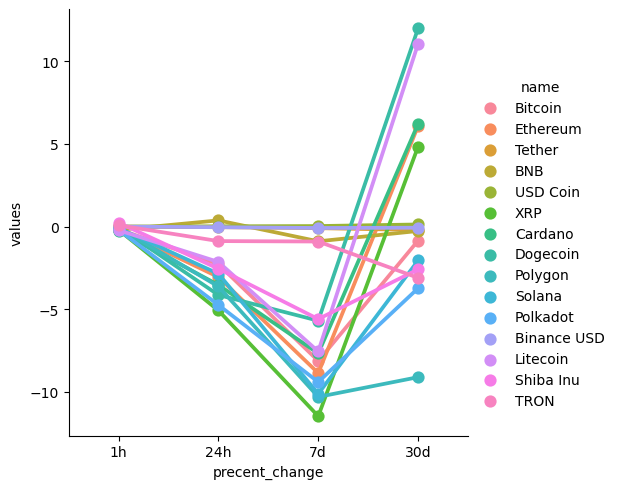

In [137]:
#visualization

import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    x='precent_change', 
    y ='values', 
    hue = 'name',
    data = df6,
    kind = 'point')

In [243]:
df7 = df[['name','quote.USD.price','timestamp']]
df7 = df7.query("name == 'Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,28077.91623,2023-04-21 14:27:16.451485+00:00
0,Bitcoin,28184.20274,2023-04-21 16:29:44.017972+02:00
0,Bitcoin,28198.38007,2023-04-21 16:30:44.454674+02:00


In [245]:
unique_names = df['name'].unique()
# create an empty list to store the dataframes
dfs = []

for name in unique_names:
    df7 = df[['name', 'quote.USD.price', 'timestamp']]
    df7 = df7.query("name == @name")
    dfs.append(df7)

df7 = pd.concat(dfs, ignore_index=True)
df7 = df7.rename(columns={'name': 'cryptName', 'quote.USD.price': 'priceInUSD', 'timestamp': 'time'})
# convert the 'time' column to a datetime object
df7['time'] = pd.to_datetime(df7['time'], utc=True)
# create a new column with the formatted date string
df7['propTime'] = df7['time'].dt.strftime('%d-%b %H:%M') 
df7

,cryptName,priceInUSD,time,propTime
0,Bitcoin,28077.91623,2023-04-21 14:27:16.451485+00:00,21-Apr 14:27
1,Bitcoin,28184.20274,2023-04-21 14:29:44.017972+00:00,21-Apr 14:29
2,Bitcoin,28198.38007,2023-04-21 14:30:44.454674+00:00,21-Apr 14:30
3,Ethereum,1907.61822,2023-04-21 14:27:16.451485+00:00,21-Apr 14:27
4,Ethereum,1914.92808,2023-04-21 14:29:44.017972+00:00,21-Apr 14:29
5,Ethereum,1916.42620,2023-04-21 14:30:44.454674+00:00,21-Apr 14:30
6,Tether,0.99984,2023-04-21 14:27:16.451485+00:00,21-Apr 14:27
7,Tether,0.99981,2023-04-21 14:29:44.017972+00:00,21-Apr 14:29
8,Tether,0.99976,2023-04-21 14:30:44.454674+00:00,21-Apr 14:30
9,BNB,326.79453,2023-04-21 14:27:16.451485+00:00,21-Apr 14:27


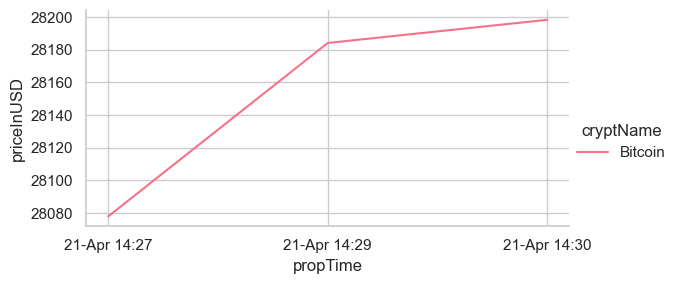

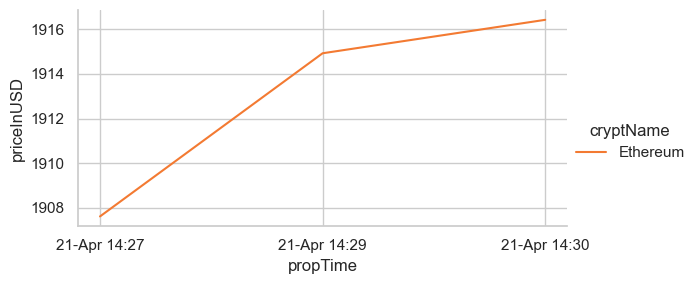

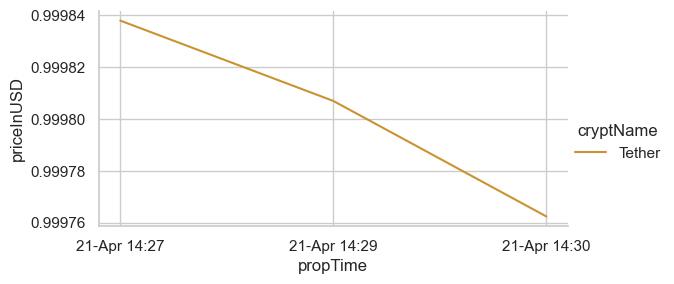

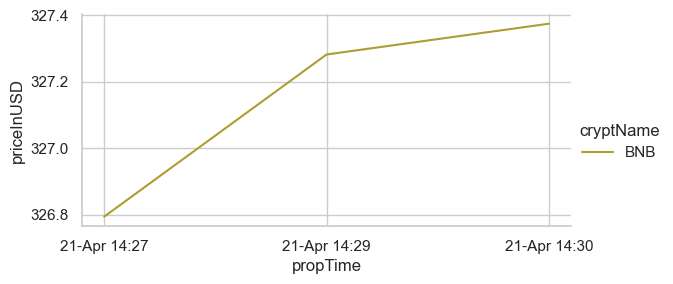

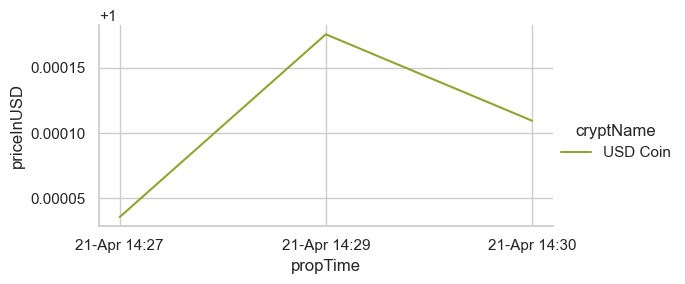

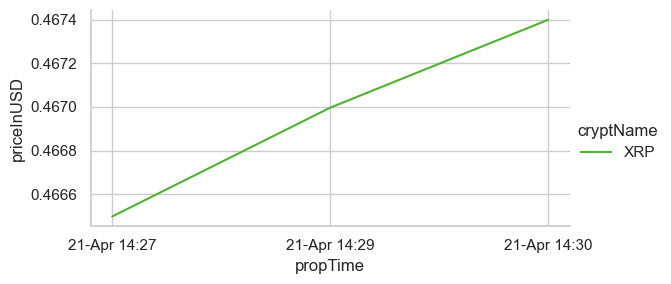

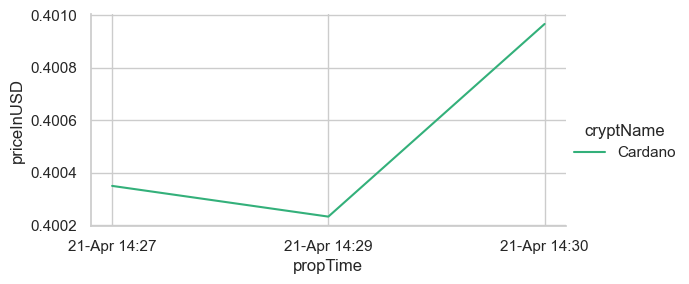

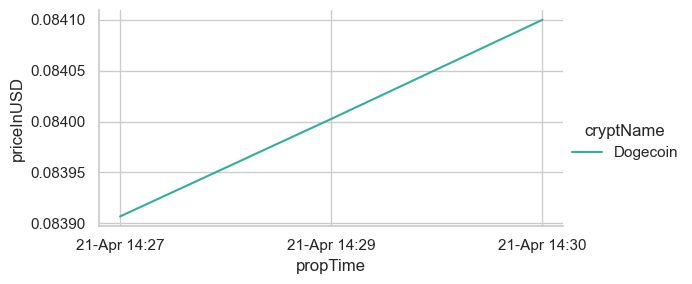

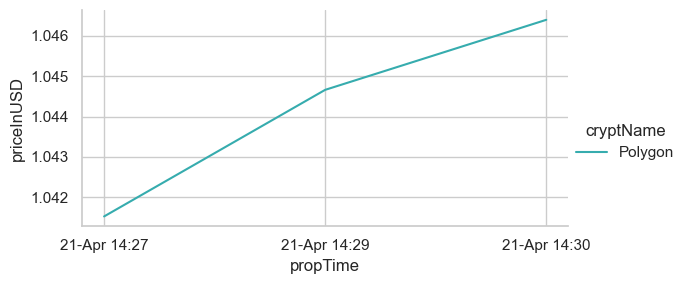

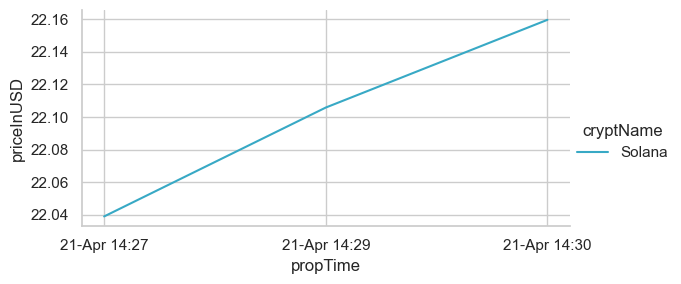

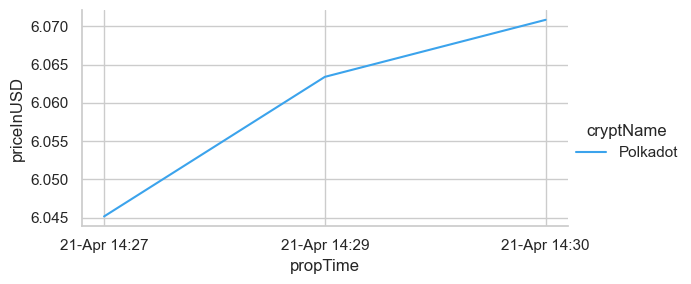

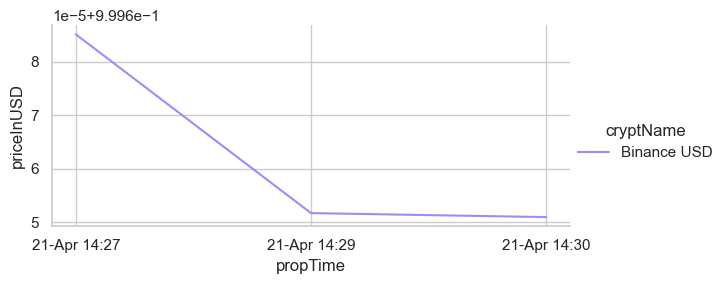

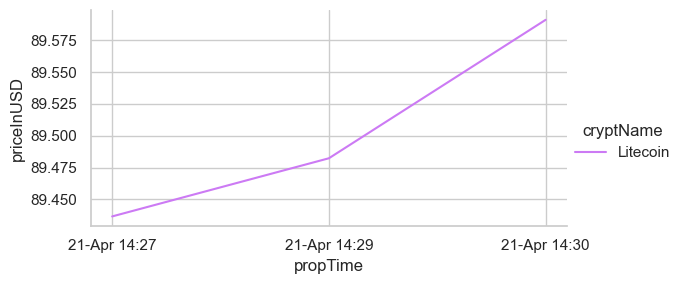

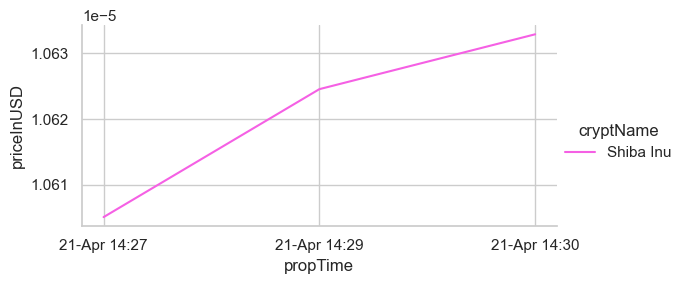

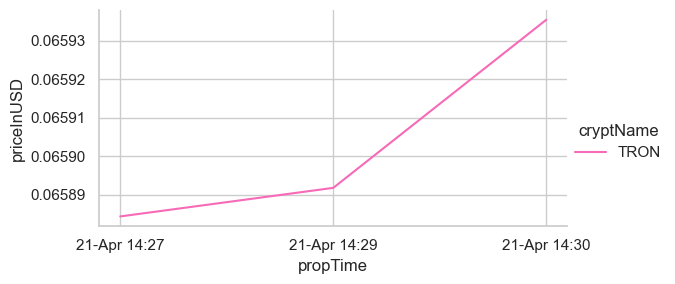

In [257]:
# create plot for each currency 

unique_names_df7= df7['cryptName'].unique()

# create a list of colors for each unique name
colors = sns.color_palette("husl", len(unique_names_df7))
#The 'enumerate()' function is used to obtain both the index and value of each unique name in 'unique_names_df7'.
for i, name in enumerate(unique_names_df7):
    df7_filtered = df7.query("cryptName == @name")
    if df7_filtered.empty:
        continue
    sns.relplot(
        data = df7_filtered,
        kind = 'line',
        x = 'propTime',
        y = 'priceInUSD',
        hue = 'cryptName',
        palette=[colors[i]],
        height=3,
        aspect=2
    )